In [1]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\pooja\Downloads\movies.csv\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [1]:
#change data types of columns
# df['budget'] = df['budget'].astype('int64')
# df['gross'] = df['gross'].astype('int64')

In [22]:
#Create correct year column
df['yearcorrect'] = df['released'].astype(str).str[-21:-16]
# df['yearcorrect'] = df['released'].astype(str).rstrip('(United States)')

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [6]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

#to remove the dots from the middle of the table
pd.set_option('display.max_rows', None)

In [9]:
#To drop duplicates
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


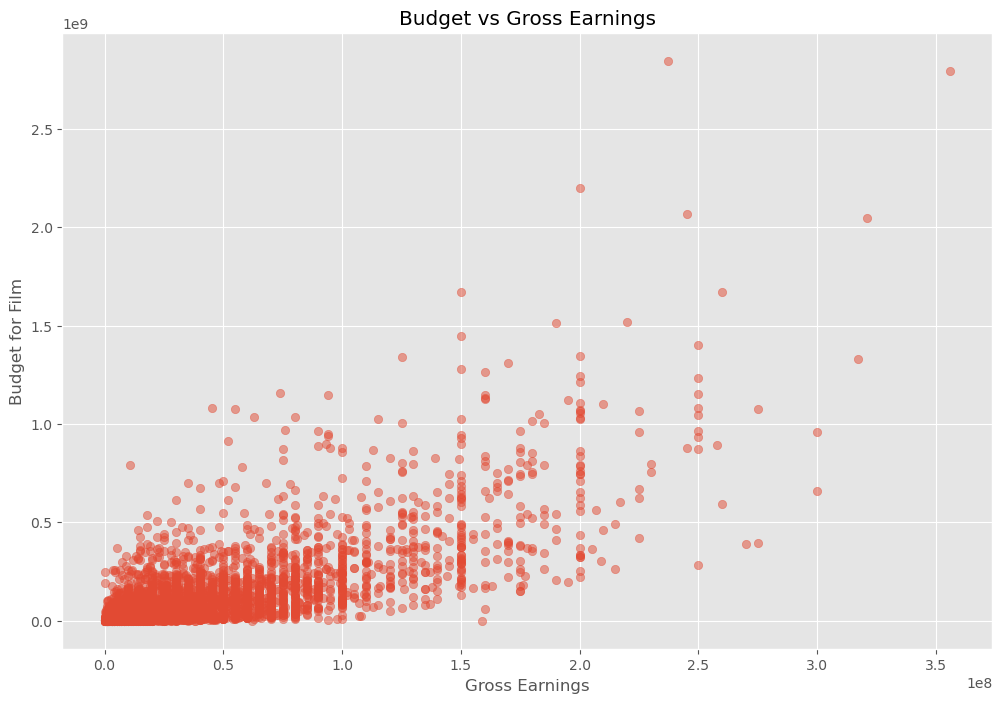

In [8]:
#Scatter plot for Budget vs Gross
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

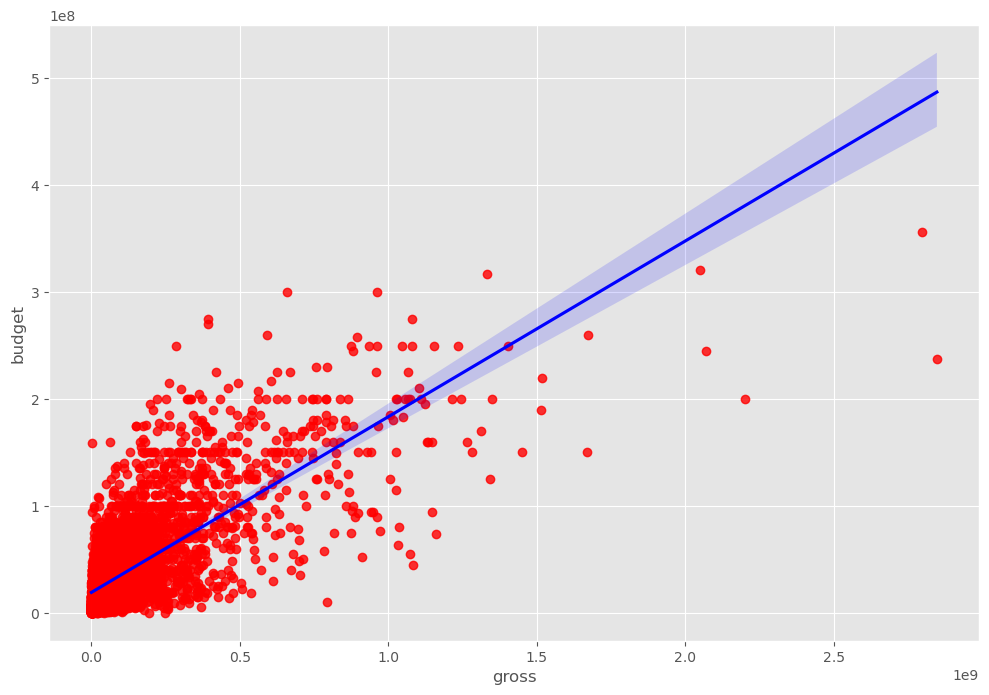

In [10]:
#Plotting Budget vs Gross using seaborn
sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [11]:
# Correlation Matrix between all numeric columns
df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [12]:
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


In [13]:
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


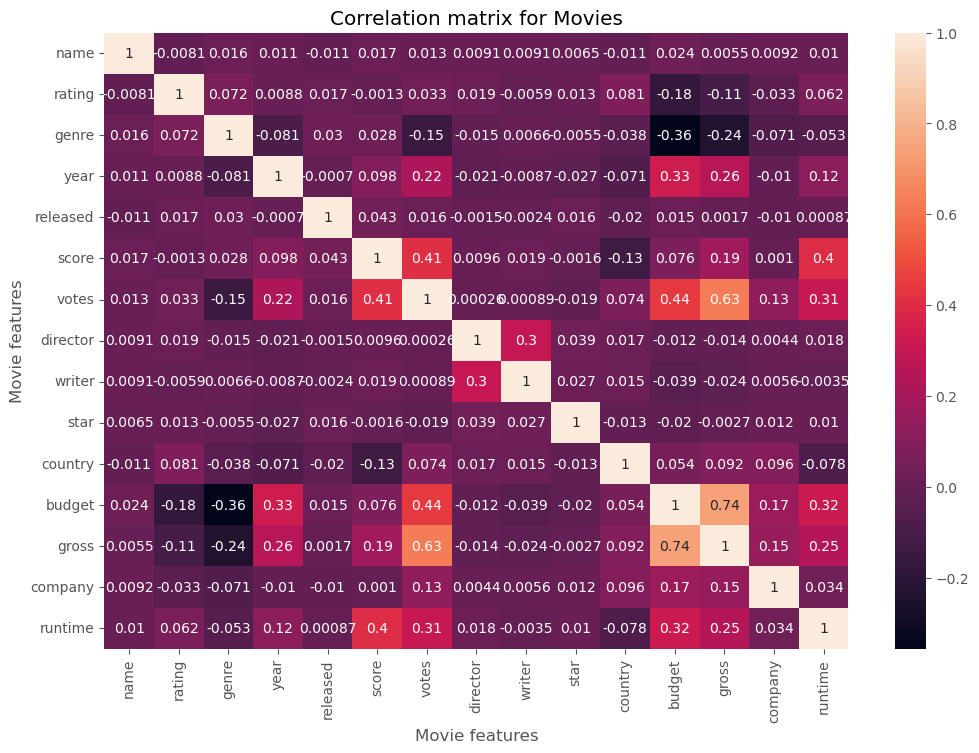

In [3]:
#Visualizing the correlation
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [8]:
#To numerize the columns with object datatype eg: genre,company,country
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [4]:
#Comparing variables among themselves
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.154269
         genre       0.036367
         year        0.965761
         released    0.959855
                       ...   
runtime  country     0.122181
         budget      0.112097
         gross       0.042978
         company     0.005232
         runtime     1.000000
Length: 225, dtype: float64


In [5]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget   company   -0.092495
company  budget    -0.092495
genre    rating    -0.091898
rating   genre     -0.091898
budget   country   -0.082974
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [6]:
# Variables that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company   star       0.527363
star      company    0.527363
company   writer     0.547126
writer    company    0.547126
director  company    0.552420
                       ...   
year      year       1.000000
genre     genre      1.000000
rating    rating     1.000000
company   company    1.000000
runtime   runtime    1.000000
Length: 71, dtype: float64


In [7]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
2319    56491421806
2281    52514188890
731     43008941346
1812    40493607415
2253    40257053857
2316    36327887792
1713    19883797684
1606    15065592411
887     11873612858
2232    11795832638
889     11635441081
1637     9230230105
2147     8373718838
1856     7886344526
1109     7443502667
Name: gross, dtype: int64